In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree

# Load the datasets
train_data = pd.read_csv('Sets/train_data.csv')
val_data = pd.read_csv('Sets/val_data.csv')

# Separate features and labels
X_train = train_data.drop(columns=['label'])
y_train = train_data['label']
X_val = val_data.drop(columns=['label'])
y_val = val_data['label']

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict the labels for the validation set
val_predicted_labels = dt_classifier.predict(X_val)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_val, val_predicted_labels)
print(f'Validation set accuracy: {accuracy:.2f}')

# Print classification report
print("\nClassification Report:")
print(classification_report(y_val, val_predicted_labels))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, val_predicted_labels))



Validation set accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       350
           1       0.64      0.65      0.64       136
           2       0.78      0.78      0.78       510
           3       0.62      0.64      0.63       244
           4       0.64      0.59      0.62       257
           5       1.00      1.00      1.00       525
           6       0.89      0.87      0.88       392
           7       0.94      0.93      0.93       122

    accuracy                           0.83      2536
   macro avg       0.80      0.80      0.80      2536
weighted avg       0.83      0.83      0.83      2536


Confusion Matrix:
[[326   5   5   8   4   0   1   1]
 [  6  88   5  14   5   0  18   0]
 [ 12   6 399  39  41   0  10   3]
 [  7   7  44 157  22   0   6   1]
 [ 15  10  46  24 152   0   8   2]
 [  0   0   0   0   0 525   0   0]
 [  1  20  10  11  10   0 340   0]
 [  1   1   4   1   2   0   0 1

Validation set accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       350
           1       0.90      0.76      0.82       136
           2       0.87      0.89      0.88       510
           3       0.75      0.87      0.80       244
           4       0.80      0.74      0.77       257
           5       1.00      1.00      1.00       525
           6       0.95      0.92      0.93       392
           7       0.99      0.98      0.99       122

    accuracy                           0.91      2536
   macro avg       0.90      0.89      0.90      2536
weighted avg       0.91      0.91      0.91      2536


Confusion Matrix:
[[346   0   2   1   1   0   0   0]
 [  5 103   3   5   6   0  14   0]
 [  2   2 454  25  23   0   4   0]
 [  0   2  27 212   3   0   0   0]
 [  1   0  29  35 189   0   2   1]
 [  0   0   0   0   0 525   0   0]
 [  0   8   2   6  15   0 361   0]
 [  0   0   2   0   0   0   0 1

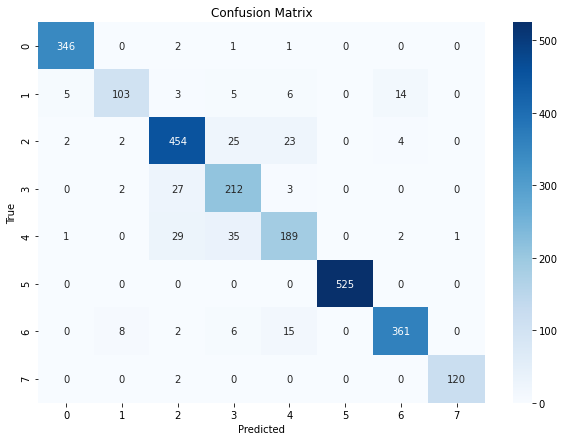

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_data = pd.read_csv('Sets/train_data.csv')
val_data = pd.read_csv('Sets/val_data.csv')

# Separate features and labels
X_train = train_data.drop(columns=['label'])
y_train = train_data['label']
X_val = val_data.drop(columns=['label'])
y_val = val_data['label']

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict the labels for the validation set
val_predicted_labels = rf_classifier.predict(X_val)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_val, val_predicted_labels)
print(f'Validation set accuracy: {accuracy:.2f}')

# Print classification report
print("\nClassification Report:")
print(classification_report(y_val, val_predicted_labels))

# Print confusion matrix
conf_matrix = confusion_matrix(y_val, val_predicted_labels)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_train.unique()), yticklabels=sorted(y_train.unique()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()